In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect = True)
session = Session(bind=engine)
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [9]:
# Design a query to retrieve the last 12 months from 08-23-2017 of precipitation data and plot the results
start_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()
start_date = np.ravel(start_date)[0]
# end_date
records = session.query(Measurement.date, func.avg(Measurement.prcp))\
          .group_by(func.strftime('%Y-%m', Measurement.date))\
          .order_by(Measurement.date.desc()).limit(12).all()
end_date = np.ravel(records[11])[0]
print(f'Start Date: {start_date} End Date: {end_date}')

Start Date: 2017-08-23 End Date: 2016-09-30


In [32]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between(end_date, start_date)).all()
precip_df = pd.DataFrame.from_records(precip)
precip_df = precip_df.rename(columns={0: 'Date', 1: 'Precipitation'})

# Sort the dataframe by date
precip_df = precip_df.set_index('Date')
print(precip_df.count())
precip_df.dropna()

Precipitation    1801
dtype: int64


,Precipitation
Date,
2016-09-30,0.00
2016-10-01,0.00
2016-10-02,0.00
2016-10-03,0.00
2016-10-04,0.00
2016-10-05,0.00
2016-10-06,0.00
2016-10-07,0.00
2016-10-08,0.00


<IPython.core.display.Javascript object>


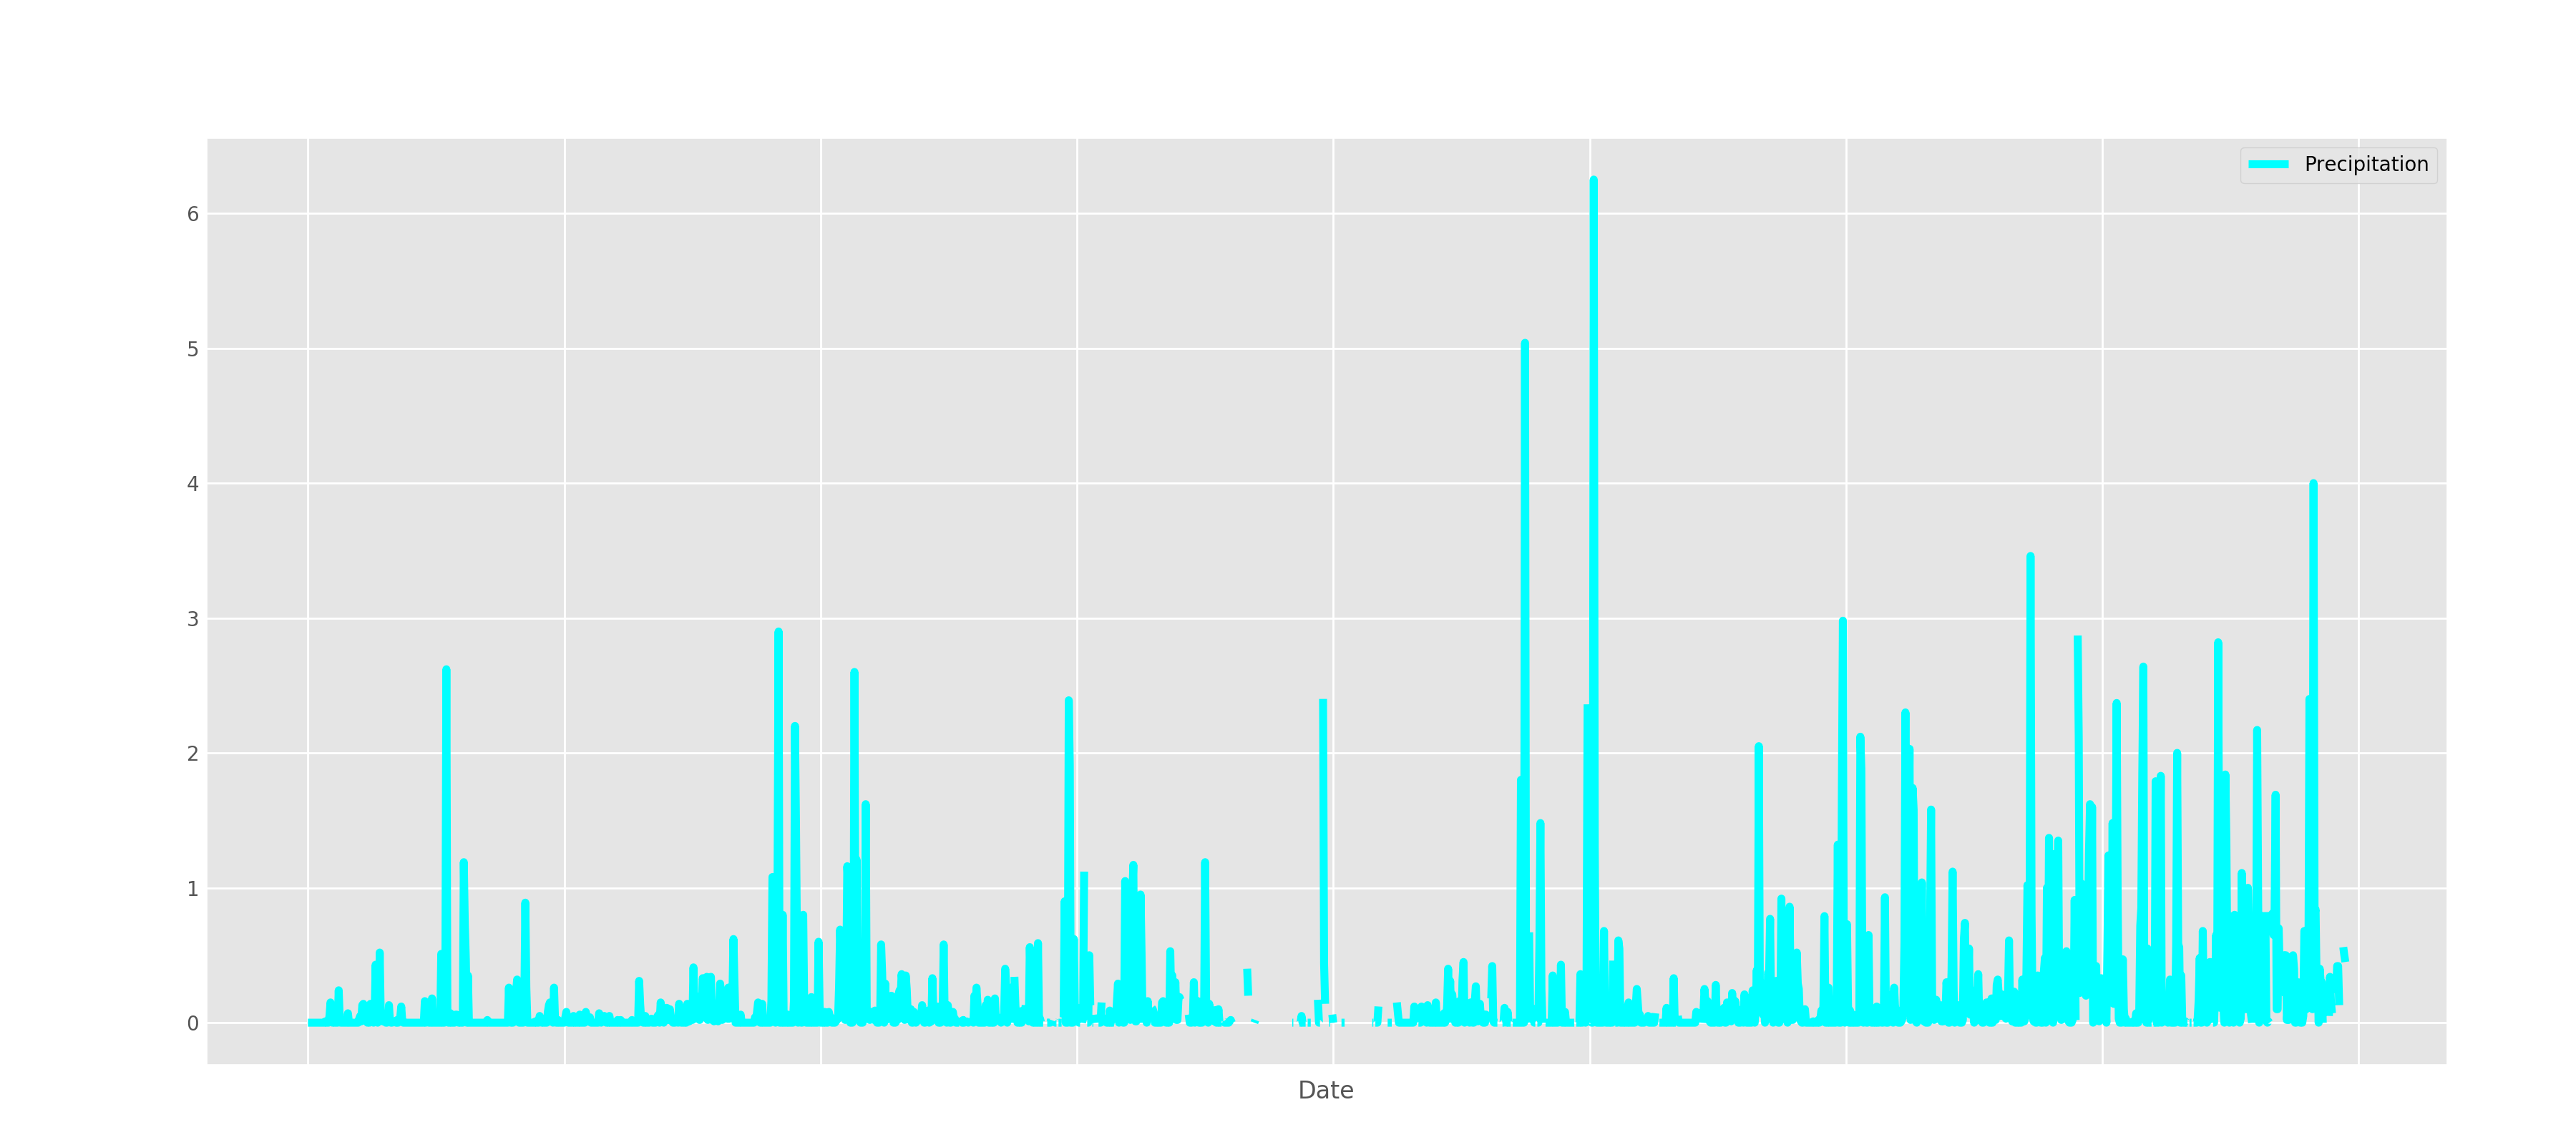

In [28]:
# Rotate the xticks for the dates
# Plot the results using the DataFrame
plt.style.use('ggplot')
precip_df.plot(figsize = (18,8), color = 'cyan', rot = 340)
plt.show()

In [130]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df["Precipitation"].describe()

count    1801.000000
mean        0.160589
std         0.424107
min         0.000000
25%         0.000000
50%         0.010000
75%         0.120000
max         6.250000
Name: Precipitation, dtype: float64

In [131]:
# How many stations are available in this dataset?
stations_count = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).count()
stations_count

9

In [132]:
# What are the most active stations?
active_stations = session.query(Measurement.station, func.count(Measurement.tobs).label('Observations'))\
                  .group_by(Measurement.station).order_by(desc(func.count(Measurement.tobs))).all()
    
# List the stations and observation counts in descending order
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [133]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = np.ravel(active_stations)[0]
most_active

'USC00519281'

In [134]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
observation_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
filter(Measurement.date.between(end_date, start_date)).\
filter(Measurement.station == most_active).all()



In [135]:
observation_df = pd.DataFrame.from_records(observation_data)
observation_df = observation_df.rename(columns={0: 'Station', 1: 'Date', 2:'Observations'})
print(observation_df.count())
observation_df.head()

Station         314
Date            314
Observations    314
dtype: int64


,Station,Date,Observations
0,USC00519281,2016-09-30,78.0
1,USC00519281,2016-10-01,77.0
2,USC00519281,2016-10-02,79.0
3,USC00519281,2016-10-03,79.0
4,USC00519281,2016-10-04,79.0


<IPython.core.display.Javascript object>


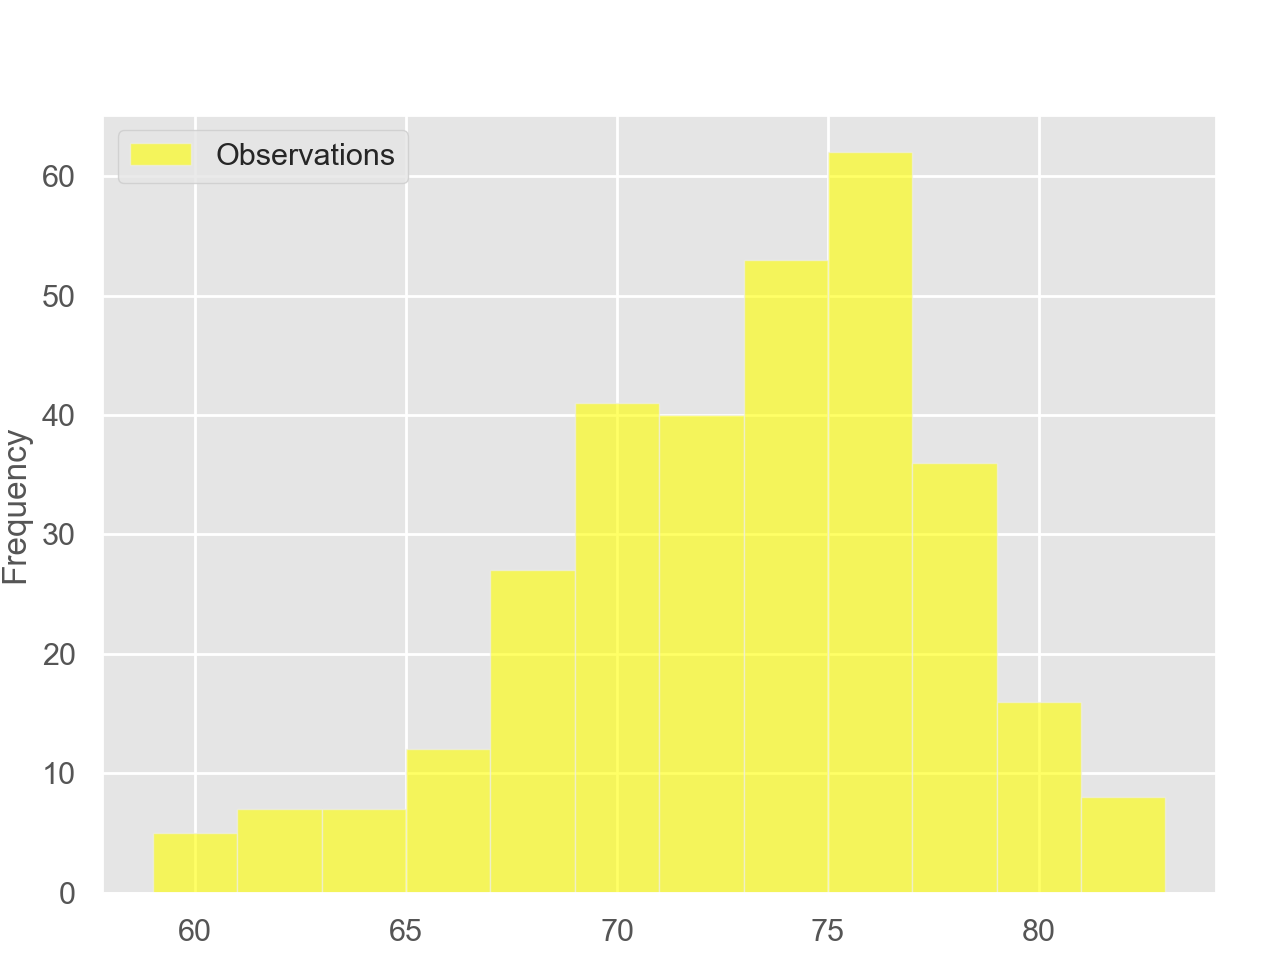

In [136]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observation_df.plot.hist(by=observation_df.Observations, bins=12, color='yellow', alpha = 0.6)
plt.ylabel("Frequency")
plt.show()

In [165]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    records=session.query(func.min(Measurement.tobs).label('max_temp'), func.avg(Measurement.tobs).label('avg_temp'), func.max(Measurement.tobs).label('min_temp')).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    return records
print(calc_temps('2017-01-30', '2017-03-03'))

[(59.0, 69.9478672985782, 80.0)]


In [166]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
records = calc_temps(end_date, start_date)
temperature_df = pd.DataFrame.from_records(records)
temperature_df = temperature_df.rename(columns={0: 'Max. Temp.', 1: 'Avg. Temp.', 2:'Min. Temp.'})
temperature_df


,Max. Temp.,Avg. Temp.,Min. Temp.
0,58.0,74.195674,87.0


<IPython.core.display.Javascript object>


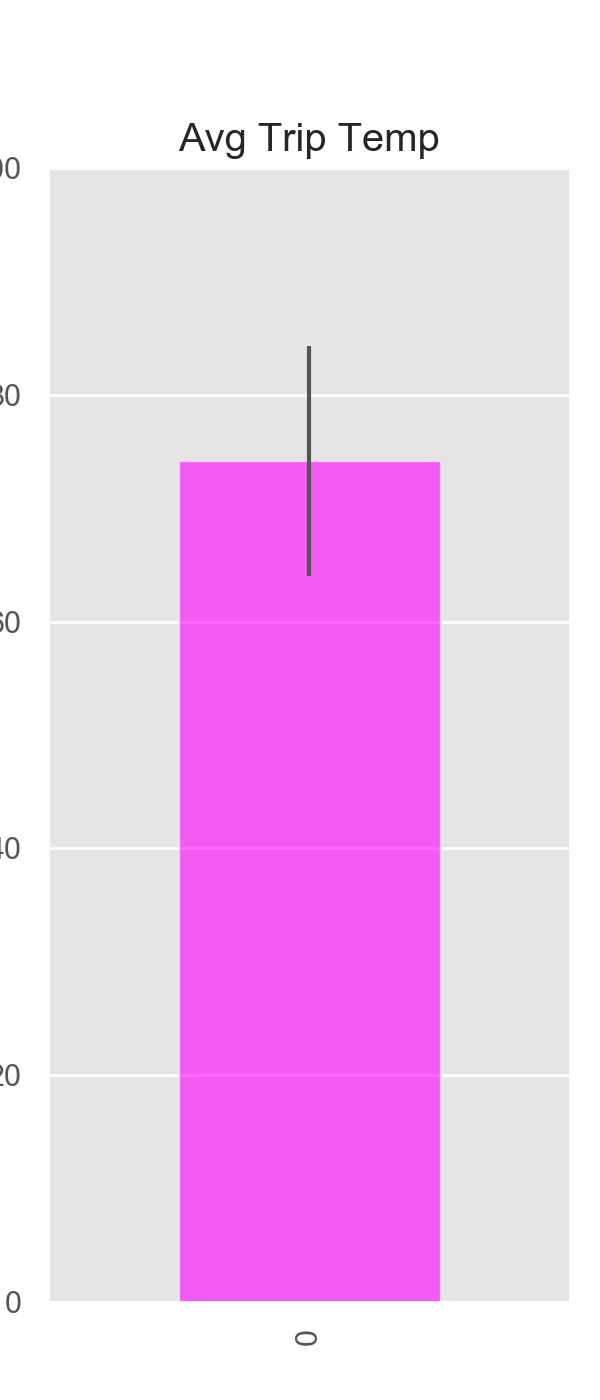

In [167]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
# Plot the min, avg, and max temperature from your previous query as a bar chart
mean = temperature_df["Avg. Temp."]
err = (temperature_df["Max. Temp."] - temperature_df["Min. Temp."] ) * 0.35

fig, ax = plt.subplots()
mean.plot.bar(yerr=err, color='magenta', width=0.5, ax=ax, figsize=(3,7), alpha=0.6)
plt.ylabel('Temp(F)')
plt.title("Avg Trip Temp")

plt.grid(False, axis='x')
plt.ylim(0,100)
# Save the figure
plt.savefig("Avg_Trip_Temp.png")
# Show Plot
plt.show()

In [144]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
#opting out

## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


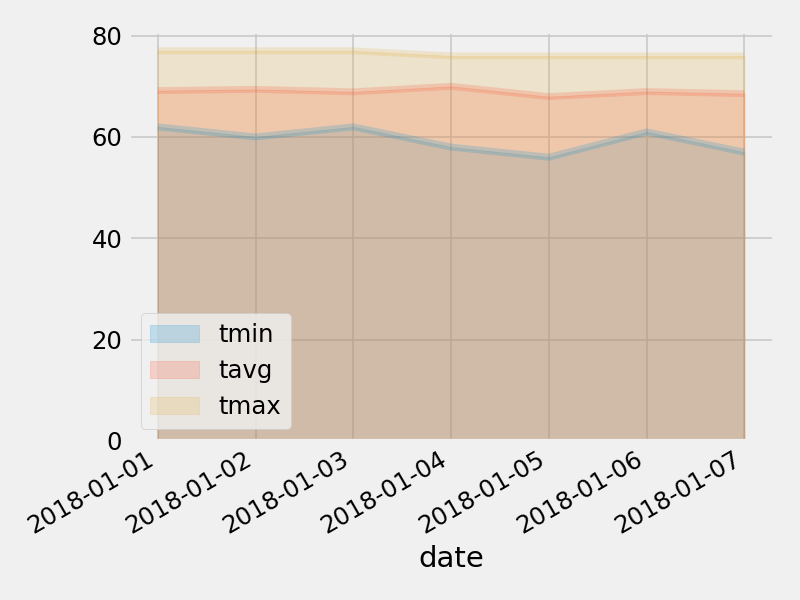

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
